In [1]:
import pandas as pd
from ord_data_load import draw_reaction_rand
from ord_data_load import ORD_PATH, ORD_REPO_PATH

In [2]:
all_reactions = pd.read_pickle(f'{ORD_PATH}/all_reactions.pkl')

In [3]:
# all Palladium containing reactions as catalyst
pd_cat = all_reactions.reaction_smile.str.contains('Pd').fillna(False)
pd_cat.sum()

132729

In [4]:
# containing palladium/Pd keyword in notes
pd_notes = all_reactions.notes.str.contains(r'Pd|[Pp]all?ad').fillna(False)
pd_notes.sum()

155574

In [5]:
# what are preceding chars (for future tokenization)
pre = all_reactions.notes.str.extract(r'(.)(?=[Pp]allad)')[0]
pre

0            i
1            i
2            i
3            i
4             
          ... 
1790143    NaN
1790144    NaN
1790145    NaN
1790146    NaN
1790147    NaN
Name: 0, Length: 1790148, dtype: object

In [6]:
pre_unique = pre.dropna().value_counts()
pre_unique

     53517
)    23229
i     6236
o     3588
-     2985
]     1449
e      888
y      318
(       73
l       72
n       37
s       36
/       18
}        9
—        4
,        3
r        3
[        3
0        1
.        1
"        1
%        1
_        1
Name: 0, dtype: int64

#### '/' ####
Reaction: 4
Solvent: [['1-propanol', 'C(CC)O']]
Catalyst [['triphenylphosphine palladium', 'C1(=CC=CC=C1)P(C1=CC=CC=C1)C1=CC=CC=C1.[Pd]']]


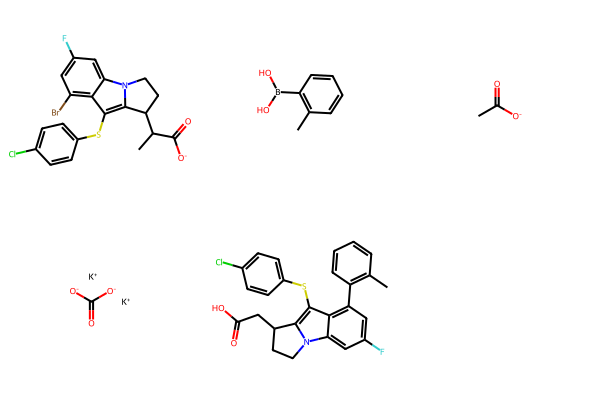

To (+/−)-methyl[8-bromo-9-[(4-chlorophenyl)sulfanyl]-6-fluoro-2,3-dihydro-1H-pyrrolo[1,2-a]indol-1-yl]acetate (Example 7, Step 9, 100 mg, 0.21 mmol) in 1-propanol (2 mL) were added 2-methylphenylboronic acid (57 mg, 0.42 mmol), 3:1 mixture of triphenylphosphine/palladium (>) acetate (11 mg) and 2M aqueous potassium carbonate (0.3 mL). The mixture was degassed and stirred at 80° C. for 6 h and the reaction mixture was cooled to r.t. Then THF (3 mL) and 1N LiOH were added and the mixture was stirred for 2 h at r.t. AcOH (0.5 mL) and brine were added and the aqueous layer was extracted with EtOAc. The combined organic layers were dried over Na2SO4 and concentrated. The residue was purified by silica gel chromatography eluted with 40% EtOAc/hexane containing 1% AcOH to give 90 mg of the title compound.


In [7]:
pre_char = pre_unique.index.values[12]
print(f"#### '{pre_char}' ####")
draw_reaction_rand(all_reactions[pre == pre_char], notes_text='allad')

In [8]:
# Single letter regex mistake
s = 'alladium'
regex_pattern = ''
for i in range(len(s)):
    print(s[:i] + f'[^{s[i]}]' + s[i+1:])
    regex_pattern += s[:i] + f'[^{s[i]}]' + s[i+1:] + '|'
regex_pattern = regex_pattern[:-1]
regex_pattern

[^a]lladium
a[^l]ladium
al[^l]adium
all[^a]dium
alla[^d]ium
allad[^i]um
alladi[^u]m
alladiu[^m]


'[^a]lladium|a[^l]ladium|al[^l]adium|all[^a]dium|alla[^d]ium|allad[^i]um|alladi[^u]m|alladiu[^m]'

In [9]:
pd_mistakes = all_reactions.notes.str.contains(f'{regex_pattern}').fillna(False)
pd_mistakes.sum()

75

Reaction: 14
Solvent: [['ethanol', 'C(C)O']]
Catalyst []


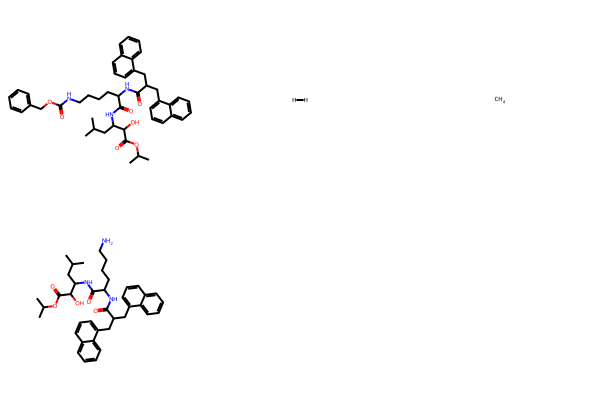

[2R-[2R*,3S*(S*)]-2-hydroxy-5-methyl-3-[[2-[[3-(1-naphthalenyl)-2-(1-naphthalenylmethyl)-1-oxopropyl]amino]-1-oxo-6-[[(phenylmethoxy)carbonyl]amino]hexyl]amino]hexanoic acid, 1-methylethyl ester, 3.97 g (5.0 mmol), is dissolved in 250 ml of absolute ethanol, 0.5 g of 20% palladiun charcoal is added, and the mixture exposed to hydrogen gas for 18 hours. After complete uptake of hydrogen the mixture is filtered and concentrated to afford 3.44 g of the title compound.


In [10]:
draw_reaction_rand(all_reactions[pd_mistakes & ~pd_cat], notes_text='dium')

In [11]:
pd_df = all_reactions[pd_cat | pd_notes | pd_mistakes]
pd_df.reset_index(drop=True, inplace=True)
len(pd_df)

156269

In [12]:
%%time
pd.to_pickle(pd_df, f'{ORD_PATH}/pd_df.pkl')

CPU times: total: 1.78 s
Wall time: 1.77 s


In [13]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

Reaction: 65337
Solvent: [['toluene', 'C1(=CC=CC=C1)C'], ['toluene', 'C1(=CC=CC=C1)C']]
Catalyst [['tetrakis(triphenylphosphine)palladium(0)', 'C=1C=CC(=CC1)[P](C=2C=CC=CC2)(C=3C=CC=CC3)[Pd]([P](C=4C=CC=CC4)(C=5C=CC=CC5)C=6C=CC=CC6)([P](C=7C=CC=CC7)(C=8C=CC=CC8)C=9C=CC=CC9)[P](C=1C=CC=CC1)(C=1C=CC=CC1)C=1C=CC=CC1']]


[09:13:17] WARNING: not removing hydrogen atom without neighbors


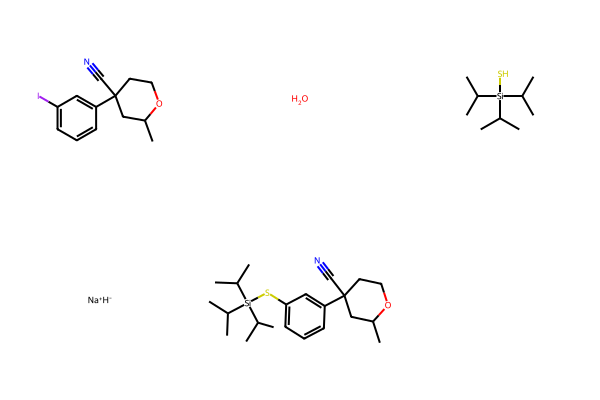

To a stirred solution of triisopropylsilanethiol (Tetrahedron Lett. 1994, 35, 3221.; 684 mg, 3.6 mmol) in toluene (5 ml) was added sodium hydride (60% oil dispersion, 144 mg, 3.6 mmol) under a nitrogen atmosphere. After stirring for 15 min, the resulting solution was added to a mixture of (2SR, 4RS)-4-cyano-4-(3-iodophenyl)-2-methyl-3,4,5,6-tetrahydro-2H-pyran (1.07 g, 3.27 mmol) and tetrakis(triphenylphosphine)palladium(0) (114 mg, 0.1 mmol) in toluene (20 ml), and the mixture was heated at 80° C. for 1 h. The resulting mixture was cooled, poured into water (50 ml) and extracted with Et2O (100 ml). The organic extract was washed with water (50 ml), brine (50 ml), dried (MgSO4) and concentrated. Purification by silica gel column chromatography, eluting with ethyl acetate-hexane (1:9), gave 1.23 g (96%) of the titled compound as a red oil.


In [14]:
draw_reaction_rand(pd_df, notes_text='alladium')